In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set()
import scipy

In [2]:
labels=[]
datas=[]

with open('D:/vscode-projects/Python-projects/ML/hw1/iris.data','r') as file:
    lines = file.readlines()

for line in lines:
    if(line=='\n'):
        break
    line = line.split(',') 
    datas.append(line[:len(line)-1])
    label = line[len(line)-1]
    label = label[0:len(label)-1]
    labels.append(label)

feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']    
labels = np.squeeze(labels)
datas = np.squeeze(datas)
datas = datas.astype('float')


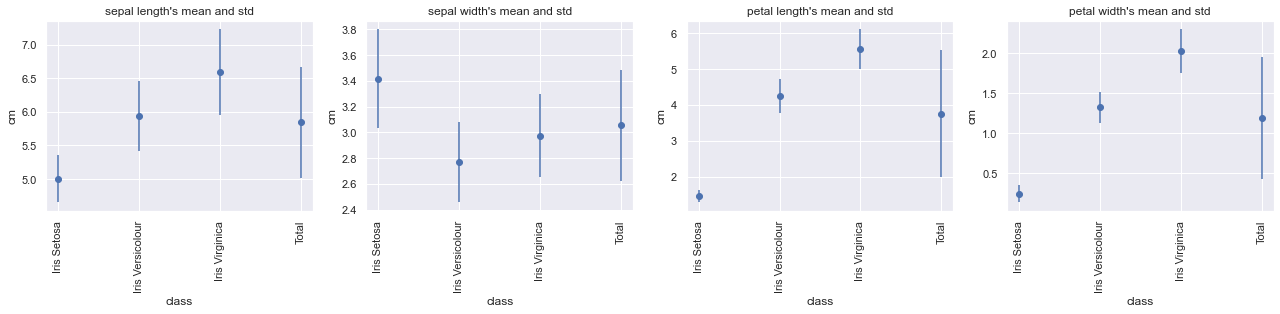

sepal length:
                      mean       std
Iris Setosa       5.006000  0.352490
Iris Versicolour  5.936000  0.516171
Iris Virginica    6.588000  0.635880
Total             5.843333  0.828066

sepal width:
                   mean       std
Iris Setosa       3.418  0.381024
Iris Versicolour  2.770  0.313798
Iris Virginica    2.974  0.322497
Total             3.054  0.433594

petal length:
                      mean       std
Iris Setosa       1.464000  0.173511
Iris Versicolour  4.260000  0.469911
Iris Virginica    5.552000  0.551895
Total             3.758667  1.764420

petal width:
                      mean       std
Iris Setosa       0.244000  0.107210
Iris Versicolour  1.326000  0.197753
Iris Virginica    2.026000  0.274650
Total             1.198667  0.763161



In [3]:
total = datas.shape[0]

labels_mask_setosa = [label in ['Iris-setosa']
                      for label in labels]                      # the mask of label Iris-setosa
datas_setosa = datas[labels_mask_setosa, :]                     # the datas of label Iris-setosa
total_setosa = datas_setosa.shape[0]

labels_mask_versicolour = [label in ['Iris-versicolor']
                      for label in labels]                      # the mask of label Iris-versicolor
datas_versicolour = datas[labels_mask_versicolour, :]           # the datas of label Iris-versicolor
total_versicolour = datas_versicolour.shape[0]

labels_mask_virginica = [label in ['Iris-virginica']
                      for label in labels]                      # the mask of label Iris-virginica
datas_virginica = datas[labels_mask_virginica, :]               # the datas of label Iris-virginica
total_virginicar = datas_virginica.shape[0]


# mean & std
setosa_mean = np.mean(datas_setosa, axis = 0)            # axis = 0 is to compute every column's mean
versicolour_mean = np.mean(datas_versicolour, axis = 0)
virginica_mean = np.mean(datas_virginica, axis = 0)
total_mean = np.mean(datas, axis = 0)

setosa_std = np.std(datas_setosa, axis = 0, ddof = 1)
versicolour_std = np.std(datas_versicolour, axis = 0, ddof = 1)
virginica_std = np.std(datas_virginica, axis = 0, ddof = 1)
total_std = np.std(datas, axis = 0, ddof = 1)


plt.figure(figsize=(22,3.5))
for i in range(4):
   
   if i==0:
      plt.subplot(141)
   elif i==1:
      plt.subplot(142)
   elif i==2:
      plt.subplot(143)
   elif i==3:
      plt.subplot(144)
   plt.errorbar(['Iris Setosa', 'Iris Versicolour', 'Iris Virginica', 'Total'], [setosa_mean[i], versicolour_mean[i], virginica_mean[i], total_mean[i]],[setosa_std[i], versicolour_std[i], virginica_std[i], total_std[i]],
       fmt='o')
   plt.xticks(np.arange(4), ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica', 'Total'], rotation='vertical')
   plt.xlabel('class')
   plt.ylabel('cm')
   plt.title(feature_names[i] + '\'s mean and std')
    
   # print(setosa_mean[i], versicolour_mean[i], virginica_mean[i], total_mean[i],setosa_std[i], versicolour_std[i], virginica_std[i], total_std[i])
plt.show()   

for i in range(4):
   print(feature_names[i]+':')
   table = pd.DataFrame( [[setosa_mean[i], setosa_std[i]],[versicolour_mean[i], versicolour_std[i]], [virginica_mean[i], virginica_std[i]],[total_mean[i], total_std[i]]], 
      index=['Iris Setosa','Iris Versicolour','Iris Virginica', 'Total'],
      columns=['mean', 'std'])
   print(table)
   print('')


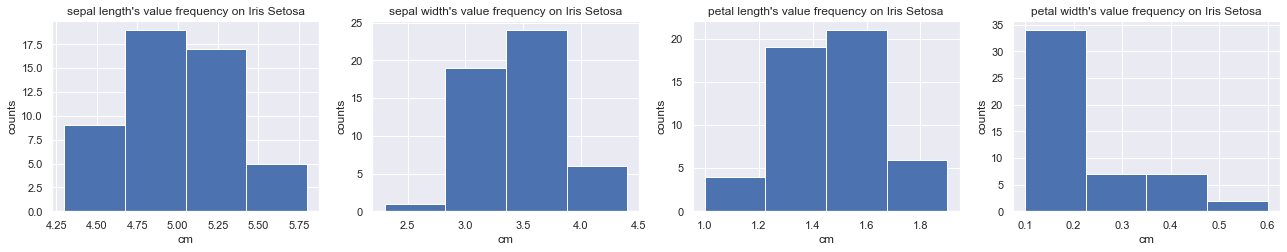

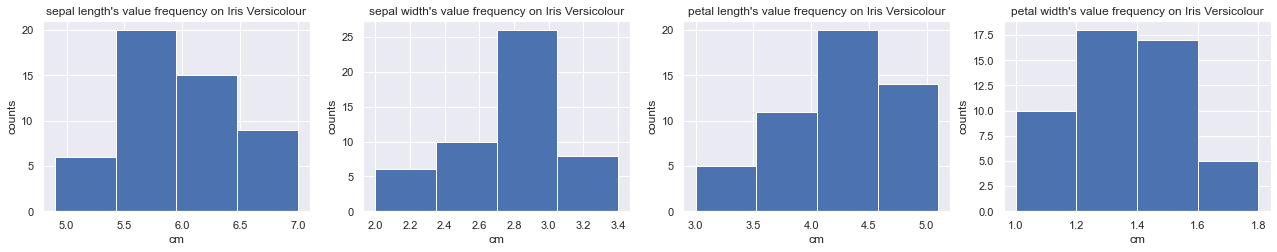

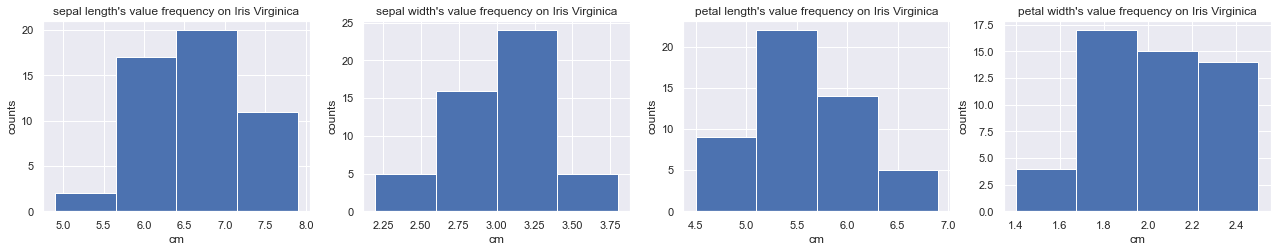

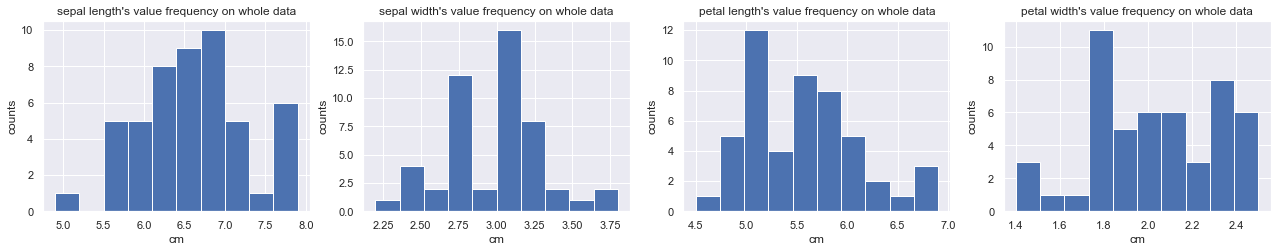

In [4]:

# Iris Setosa
plt.figure(figsize=(22,3.5))
for i in range(4):
   
    if i==0:
      plt.subplot(141)
    elif i==1:
      plt.subplot(142)
    elif i==2:
      plt.subplot(143)
    elif i==3:
      plt.subplot(144)

    n , bins, patch = plt.hist(datas_setosa[:, i], bins=4)
    
    plt.xlabel('cm') 
    plt.ylabel('counts') 
    plt.title(feature_names[i] + '\'s value frequency on Iris Setosa')

plt.show()

# Iris Versicolour
plt.figure(figsize=(22,3.5))
for i in range(4):
   
    if i==0:
      plt.subplot(141)
    elif i==1:
      plt.subplot(142)
    elif i==2:
      plt.subplot(143)
    elif i==3:
      plt.subplot(144)

    n , bins, patch = plt.hist(datas_versicolour[:, i], bins=4)
    
    plt.xlabel('cm') 
    plt.ylabel('counts') 
    plt.title(feature_names[i] + '\'s value frequency on Iris Versicolour')

plt.show()

# Iris Virginica
plt.figure(figsize=(22,3.5))
for i in range(4):
   
    if i==0:
      plt.subplot(141)
    elif i==1:
      plt.subplot(142)
    elif i==2:
      plt.subplot(143)
    elif i==3:
      plt.subplot(144)

    n , bins, patch = plt.hist(datas_virginica[:, i], bins=4)
    
    plt.xlabel('cm') 
    plt.ylabel('counts') 
    plt.title(feature_names[i] + '\'s value frequency on Iris Virginica')

plt.show()

# Total
plt.figure(figsize=(22,3.5))
for i in range(4):
   
    if i==0:
      plt.subplot(141)
    elif i==1:
      plt.subplot(142)
    elif i==2:
      plt.subplot(143)
    elif i==3:
      plt.subplot(144)

    n , bins, patch = plt.hist(datas_virginica[:, i], bins=10)
    
    plt.xlabel('cm') 
    plt.ylabel('counts') 
    plt.title(feature_names[i] + '\'s value frequency on whole data')

plt.show()



(150, 4)


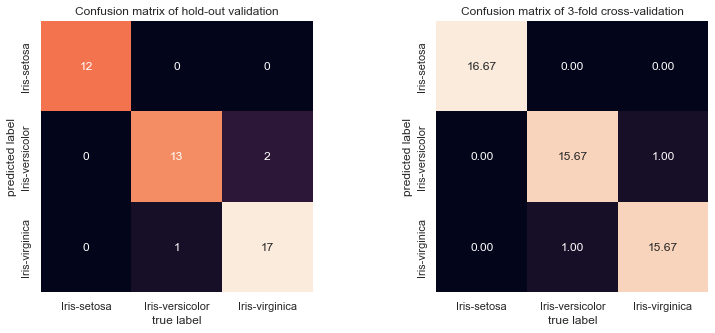

                hold-out validation  3-fold cross-validation
total accuracy             0.933333                     0.96
Iris-setosa:
                         Precision  Recall
hold-out validation            1.0     1.0
3-fold cross-validation        1.0     1.0
Iris-versicolor:
                         Precision    Recall
hold-out validation       0.866667  0.928571
3-fold cross-validation   0.923077  0.934371
Iris-virginica:
                         Precision    Recall
hold-out validation       0.944444  0.894737
3-fold cross-validation   0.938889  0.954545


In [5]:
print(datas.shape)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
datas, encoded_labels = utils.shuffle(datas, encoded_labels)

# hold-out validation
train_datas, test_datas, train_labels, test_labels = train_test_split(datas, encoded_labels, test_size=0.3, random_state=1)

model_h = GaussianNB()  
model_h.fit(train_datas, train_labels)
predicts_h = model_h.predict(test_datas)
mat_h = confusion_matrix(test_labels, predicts_h)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.heatmap(mat_h.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_encoder.inverse_transform([0, 1, 2]), yticklabels=label_encoder.inverse_transform([0, 1, 2]))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion matrix of hold-out validation')


precision_h = metrics.precision_score(test_labels, predicts_h, average=None)
recall_h = metrics.recall_score(test_labels, predicts_h, average=None)
accuracy_h = metrics.accuracy_score(test_labels, predicts_h)
# print(precision_h, recall_h, accuracy_h)

# K-fold cross-validation with K=3
kf = KFold(n_splits=3)
precision_k = []
recall_k = []
accuracy_k = []
total_accuracy_k =[]
mat_k = []
model_k = GaussianNB()  
for train_index, test_index in kf.split(datas):
    train_datas, test_datas = datas[train_index], datas[test_index]
    train_labels, test_labels = encoded_labels[train_index], encoded_labels[test_index]

       
    model_k.fit(train_datas, train_labels)
    predicts_k = model_k.predict(test_datas)
    mat_k.append(confusion_matrix(test_labels, predicts_k))
    
    precision_k.append(metrics.precision_score(test_labels, predicts_k, average=None))
    recall_k.append(metrics.recall_score(test_labels, predicts_k, average=None))
    accuracy_k.append(metrics.accuracy_score(test_labels, predicts_k))

precision_k = np.mean(precision_k, axis=0)
recall_k = np.mean(recall_k, axis=0)
accuracy_k = np.mean(accuracy_k, axis=0)
mat_k = np.mean(mat_k, axis = 0)
# print(precision_k, recall_k, accuracy_k)

plt.subplot(122)
sns.heatmap(mat_k.T, square=True, annot=True, fmt='.2f', cbar=False,
            xticklabels=label_encoder.inverse_transform([0, 1, 2]), yticklabels=label_encoder.inverse_transform([0, 1, 2]))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion matrix of 3-fold cross-validation')
plt.show()

table = pd.DataFrame( [[accuracy_h, accuracy_k]], 
        index=['total accuracy'],
        columns=['hold-out validation', '3-fold cross-validation'])
print(table)
# print('')
for i in range(0,3):
    if i==0:
        print('Iris-setosa:')
    elif i==1:
        print('Iris-versicolor:')
    elif i==2:
        print('Iris-virginica:')

    table = pd.DataFrame( [[precision_h[i], recall_h[i]],[precision_k[i], recall_k[i]]], 
        index=['hold-out validation', '3-fold cross-validation'],
        columns=['Precision', 'Recall'])
    print(table)

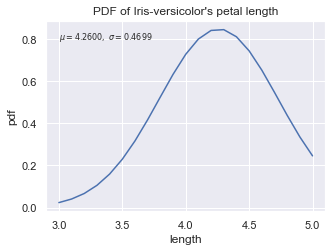

In [6]:
# P(X petal_length | Y = Iris Versicolour) 
mu = versicolour_mean[2]
std = versicolour_std[2]

minvalue = datas_versicolour[:, 2].min()
maxvalue = datas_versicolour[:, 2].max()

x_values = np.arange(minvalue, maxvalue, 0.1)
y_values = scipy.stats.norm(mu, std)
plt.figure(figsize=(5,3.5))
plt.plot(x_values, y_values.pdf(x_values))
plt.text(3, 0.8, r'$\mu=%.4f,\ \sigma=%.4f$' %(mu, std), fontsize=8)
plt.title("PDF of Iris-versicolor's petal length")
plt.xlabel('length') 
plt.ylabel('pdf') 
plt.show()
